# Goals

1. How many genes were mapped to increased and decreased modifications (by top scoring ones)?
2. What pathways are they involved in?
3. What kind of binding sites are affected?


## 1. How many genes?

In [ ]:
import os
import pandas as pd

In [ ]:
name_of_test = 'test2'
modkit_score = 8
minfi_score = 50

In [ ]:
colour = '#D3D3D3'

In [ ]:
def get_gene_info(data_source, score):
    path2outdata = f"/home/dejlu879/20240731-BEBIC_dmr/pipeline_{name_of_test}/output_data/"
    fp = os.path.join(path2outdata, f"sig_DMPs.BEBIC_B.{name_of_test}.annotated_all.{data_source}.csv")

    with open(fp, 'r') as fd:
        raw_data = pd.read_csv(fd, index_col=0, dtype = {'EntrezID': 'Int64'})
    
    # Filter by selected score
    data = raw_data[raw_data['score'] >= score]
    # Get only rows with genes
    data = data[data['gene_id'].notna()]
    
    # Select genes with mods that have increased mod with BCG
    up_mod_data = data[data['balanced_effect_size'] < 0]
    # Select genes with mods that have decreased mod with BCG
    down_mod_data = data[data['balanced_effect_size'] > 0]

    # Get only gene columns for each set of data 
    up_mod_genes = up_mod_data.loc[:, ['gene_id', 'gene_id_strand', 'gene_description', 'EntrezID']]
    down_mod_genes = down_mod_data.loc[:, ['gene_id', 'gene_id_strand', 'gene_description', 'EntrezID']]
    # Drop duplicate rows (multiple modified locations within a gene)
    up_mod_genes = up_mod_genes.drop_duplicates()
    down_mod_genes = down_mod_genes.drop_duplicates()
    
    number_of_down_genes = len(down_mod_data)
    number_of_up_genes = len(up_mod_data)
    print(f'number of up mod genes: {number_of_up_genes}')
    print(f'number of down mod genes: {number_of_down_genes}')

    save_up_genes = os.path.join(path2outdata, f"up_modded_genes.{name_of_test}.{data_source}.csv")
    save_down_genes = os.path.join(path2outdata, f"down_modded_genes.{name_of_test}.{data_source}.csv")
    up_mod_genes.to_csv(save_up_genes)
    down_mod_genes.to_csv(save_down_genes)
    
    return raw_data

# data.head()

In [ ]:
print('modkit')
_ = get_gene_info(data_source = 'modkit', score = modkit_score)
print('')
print('minfi')
minfi_data = get_gene_info(data_source = 'minfi', score = minfi_score)

modkit
number of up mod genes: 22
number of down mod genes: 16

minfi
number of up mod genes: 5
number of down mod genes: 6


In [ ]:
minfi_data.head()

,seqnames,start,end,width,strand,balanced_effect_size,score,pval,name,also_in_other,...,SJCRH30.H3K4me1,SJCRH30.H3K4me3,SJCRH30.H3K9me3,SJSA1.H3K27ac,SJSA1.H3K27me3,SJSA1.H3K36me3,SJSA1.H3K4me3,SJSA1.H3K9me3,VCaP.CTCF,VCaP.H3K27ac
1,chr1,22116,22117,2,*,-0.225287,6.792485,0.002059,1.1,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,10465965,10465966,2,*,0.226603,4.158314,0.008516,1.2,no,...,NaN,NaN,NaN,NaN,peak_266,NaN,NaN,NaN,NaN,NaN
3,chr1,10489582,10489583,2,*,-0.177225,2.057700,0.007221,1.3,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,16053186,16053187,2,*,0.220307,5.606047,0.002022,1.4,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,chr1,16285891,16285892,2,*,0.108673,3.332276,0.009697,1.5,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Binding sites

In [ ]:
def get_binding_info(data_source, score):
    path2outdata = f"/home/dejlu879/20240731-BEBIC_dmr/pipeline_{name_of_test}/output_data/"
    fp = os.path.join(path2outdata, f"sig_DMPs.BEBIC_B.{name_of_test}.annotated_all.{data_source}.csv")

    with open(fp, 'r') as fd:
        raw_data = pd.read_csv(fd, index_col=0, dtype = {'EntrezID': 'Int64'})
    
    # Filter by selected score
    data = raw_data[raw_data['score'] >= score]
    
    # Select genes with mods that have increased mod with BCG
    up_mod_data = data[data['balanced_effect_size'] < 0]
    # Select genes with mods that have decreased mod with BCG
    down_mod_data = data[data['balanced_effect_size'] > 0]
        
    return up_mod_data

print('modkit')
df = get_binding_info(data_source = 'modkit', score = modkit_score)
df

modkit


,seqnames,start,end,width,strand,balanced_effect_size,score,pval,name,also_in_other,...,SJCRH30.H3K4me1,SJCRH30.H3K4me3,SJCRH30.H3K9me3,SJSA1.H3K27ac,SJSA1.H3K27me3,SJSA1.H3K36me3,SJSA1.H3K4me3,SJSA1.H3K9me3,VCaP.CTCF,VCaP.H3K27ac
158,chr1,222619052,222619053,2,*,-0.297314,8.084545,2.335975e-04,1.158,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,chr1,235312403,235312404,2,*,-0.183824,14.141504,8.123779e-03,1.165,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,chr1,235312406,235312407,2,*,-0.203600,16.527648,2.297642e-03,1.166,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,chr1,235312421,235312422,2,*,-0.200051,14.298872,2.040812e-03,1.167,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,chr2,592715,592716,2,*,-0.282051,8.205427,9.380789e-05,2.2,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,chr2,65542831,65542832,2,*,-0.267960,8.261129,2.142134e-04,2.46,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,chr2,94581964,94581965,2,*,-0.178629,8.841469,6.084978e-03,2.63,no,...,NaN,NaN,NaN,NaN,NaN,peak_31294,NaN,peak_30464,NaN,NaN
318,chr3,172578964,172578965,2,*,-0.376984,9.010052,5.750578e-06,3.62,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,chr5,35924971,35924972,2,*,-0.266284,12.291209,7.350609e-07,5.18,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,chr5,56565703,56565704,2,*,-0.290230,8.232891,2.665225e-04,5.39,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What pathways are they involved in?

In [ ]:
library("goseq")
library("GenomicRanges")
library("data.table")
library("AnnotationHub")
library("GenomicFeatures")
library(stringi)
library(org.Hs.eg.db)
library(limma)
library(dplyr)

Loading required package: BiasedUrn

Loading required package: geneLenDataBase





Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:geneLenDataBase’:

    unfactor


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges



In [ ]:
name_of_test = 'test2'
data_source = 'modkit'


path2outdata = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data")
# fp_up = paste0(path2outdata, "/up_modded_genes.", name_of_test, ".", data_source, ".csv")
fp_down = paste0(path2outdata, "/down_modded_genes.", name_of_test, ".", data_source, ".csv")

# load in gr objects from csv
down_df <- read.csv(fp_down, colClasses=c("EntrezID"="character"))


In [ ]:
down_df

X,gene_id,gene_id_strand,gene_description,EntrezID
<int>,<chr>,<chr>,<chr>,<chr>
248,TMEM131,-,transmembrane protein 131,23505
269,ROBO1,-,roundabout guidance receptor 1,6091
299,LOC105374111,+,uncharacterized LOC105374111,105374111
743,LINC03007,-,long intergenic non-protein coding RNA 3007,646588
902,LOC124901648,+,putative uncharacterized protein FLJ44672,124901648
1048,OR2A1-AS1,-,OR2A1 antisense RNA 1,101928492
1420,LOFF_G0010304,+,"RNA, 45S pre-ribosomal 2",106631779
1833,LINC00470,-,long intergenic non-protein coding RNA 470,56651
2117,RYR1,+,ryanodine receptor 1,6261


In [ ]:
gene_list = unique(stri_remove_empty(c(down_df$EntrezID)))
gene_list

[1] "23505"     "6091"      "105374111" "646588"    "124901648" "101928492"
 [7] "106631779" "56651"     "6261"      "64857"     "105372714" "6789"     
[13] "105372630" "5740"      "85319"

In [ ]:
goana_result = goana(gene_list)
goana_result = goana_result[goana_result$DE != 0, ]
goana_result = goana_result[goana_result $P.DE < 0.05, ]
goana_result

,Term,Ont,N,DE,P.DE
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
GO:0032102,negative regulation of response to external stimulus,BP,437,2,0.0086037940
GO:0048584,positive regulation of response to stimulus,BP,2421,3,0.0382926373
GO:0048585,negative regulation of response to stimulus,BP,1809,3,0.0175373494
GO:0048731,system development,BP,4172,4,0.0335122677
GO:0001525,angiogenesis,BP,637,3,0.0009093013
GO:0001568,blood vessel development,BP,822,3,0.0019034641
GO:0001944,vasculature development,BP,856,3,0.0021391149
GO:0009653,anatomical structure morphogenesis,BP,2791,4,0.0080384208
GO:0030334,regulation of cell migration,BP,1076,2,0.0470975448


In [ ]:
# Map GO terms to my genes
go_key = "GO:0032102"
go_desc = "term"

x <- org.Hs.egGO2ALLEGS
Rkeys(x) <- go_key
go_term_allgenes <- mappedLkeys(x)
my_entrezids = intersect(go_term_allgenes, gene_list)
my_entrezids

[1] "5740" "6091"

In [ ]:
down_df

X,gene_id,gene_id_strand,gene_description,EntrezID
<int>,<chr>,<chr>,<chr>,<chr>
248,TMEM131,-,transmembrane protein 131,23505
269,ROBO1,-,roundabout guidance receptor 1,6091
299,LOC105374111,+,uncharacterized LOC105374111,105374111
743,LINC03007,-,long intergenic non-protein coding RNA 3007,646588
902,LOC124901648,+,putative uncharacterized protein FLJ44672,124901648
1048,OR2A1-AS1,-,OR2A1 antisense RNA 1,101928492
1420,LOFF_G0010304,+,"RNA, 45S pre-ribosomal 2",106631779
1833,LINC00470,-,long intergenic non-protein coding RNA 470,56651
2117,RYR1,+,ryanodine receptor 1,6261


In [ ]:
# Initialize an empty dataframe to store results
results <- data.frame()

# Loop through each row of the GO dataframe
for (go_key in rownames(goana_result)) {
  go_desc <- goana_result[go_key, "Term"]
  
  x <- org.Hs.egGO2ALLEGS
  Rkeys(x) <- go_key
  go_term_allgenes <- mappedLkeys(x)
  
  # Find intersecting genes
  my_entrezids <- intersect(go_term_allgenes, down_df$EntrezID)
  
  # Filter down_df for matching EntrezIDs
  matching_genes <- down_df %>% filter(EntrezID %in% my_entrezids)
  
  # Create a dataframe with the GO term and matching genes
  temp_df <- matching_genes %>%
    mutate(GO_Term = go_key, GO_Description = go_desc) %>%
    select(GO_Term, GO_Description, everything())
  
  # Append to results dataframe
  results <- bind_rows(results, temp_df)
}

# View the results
results

GO_Term,GO_Description,X,gene_id,gene_id_strand,gene_description,EntrezID
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
GO:0032102,negative regulation of response to external stimulus,269,ROBO1,-,roundabout guidance receptor 1,6091
GO:0032102,negative regulation of response to external stimulus,3122,PTGIS,-,prostaglandin I2 synthase,5740
GO:0048584,positive regulation of response to stimulus,269,ROBO1,-,roundabout guidance receptor 1,6091
GO:0048584,positive regulation of response to stimulus,3023,STK4,+,serine/threonine kinase 4,6789
GO:0048584,positive regulation of response to stimulus,3122,PTGIS,-,prostaglandin I2 synthase,5740
GO:0048585,negative regulation of response to stimulus,269,ROBO1,-,roundabout guidance receptor 1,6091
GO:0048585,negative regulation of response to stimulus,3023,STK4,+,serine/threonine kinase 4,6789
GO:0048585,negative regulation of response to stimulus,3122,PTGIS,-,prostaglandin I2 synthase,5740
GO:0048731,system development,269,ROBO1,-,roundabout guidance receptor 1,6091


KEGG

In [ ]:
kegga_result = kegga(gene_list)
kegga_result = kegga_result[kegga_result$DE != 0, ]
kegga_result = kegga_result[kegga_result$P.DE < 0.05, ]
kegga_result

,Pathway,N,DE,P.DE
,<chr>,<dbl>,<dbl>,<dbl>
hsa00590,Arachidonic acid metabolism,63,1,0.02919511
hsa04713,Circadian entrainment,97,1,0.04468303
hsa04730,Long-term depression,60,1,0.02781954
hsa05223,Non-small cell lung cancer,73,1,0.03376978


In [ ]:
dim(getGeneKEGGLinks("hsa"))
head(getGeneKEGGLinks("hsa"))

[1] 37154     2

,GeneID,PathwayID
,<chr>,<chr>
1,10327,hsa00010
2,124,hsa00010
3,125,hsa00010
4,126,hsa00010
5,127,hsa00010
6,128,hsa00010


In [ ]:
df_new <- filter(getGeneKEGGLinks("hsa"), GeneID %in% gene_list)
df_new

GeneID,PathwayID
<chr>,<chr>
5740,hsa00590
5740,hsa01100
6789,hsa04010
6789,hsa04014
6261,hsa04020
6789,hsa04068
6091,hsa04360
6261,hsa04371
6261,hsa04713


In [ ]:
head(getKEGGPathwayNames(species.KEGG = "hsa",remove.qualifier = TRUE))

,PathwayID,Description
,<chr>,<chr>
1,hsa01100,Metabolic pathways
2,hsa01200,Carbon metabolism
3,hsa01210,2-Oxocarboxylic acid metabolism
4,hsa01212,Fatty acid metabolism
5,hsa01230,Biosynthesis of amino acids
6,hsa01232,Nucleotide metabolism


In [ ]:
df_w_desc <- left_join(x = df_new, y = getKEGGPathwayNames(species.KEGG = "hsa",remove.qualifier = TRUE))
df_w_desc

Joining with `by = join_by(PathwayID)`


GeneID,PathwayID,Description
<chr>,<chr>,<chr>
5740,hsa00590,Arachidonic acid metabolism
5740,hsa01100,Metabolic pathways
6789,hsa04010,MAPK signaling pathway
6789,hsa04014,Ras signaling pathway
6261,hsa04020,Calcium signaling pathway
6789,hsa04068,FoxO signaling pathway
6091,hsa04360,Axon guidance
6261,hsa04371,Apelin signaling pathway
6261,hsa04713,Circadian entrainment


In [ ]:
df_w_desc_gene <- left_join(x = df_w_desc, y = down_df, by = c('GeneID' = 'EntrezID'))
df_w_desc_gene$X = NULL
df_w_desc_gene

GeneID,PathwayID,Description,gene_id,gene_id_strand,gene_description
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5740,hsa00590,Arachidonic acid metabolism,PTGIS,-,prostaglandin I2 synthase
5740,hsa01100,Metabolic pathways,PTGIS,-,prostaglandin I2 synthase
6789,hsa04010,MAPK signaling pathway,STK4,+,serine/threonine kinase 4
6789,hsa04014,Ras signaling pathway,STK4,+,serine/threonine kinase 4
6261,hsa04020,Calcium signaling pathway,RYR1,+,ryanodine receptor 1
6789,hsa04068,FoxO signaling pathway,STK4,+,serine/threonine kinase 4
6091,hsa04360,Axon guidance,ROBO1,-,roundabout guidance receptor 1
6261,hsa04371,Apelin signaling pathway,RYR1,+,ryanodine receptor 1
6261,hsa04713,Circadian entrainment,RYR1,+,ryanodine receptor 1


Binding sites

In [ ]:
down_df

X,gene_id,gene_id_strand,gene_description,EntrezID
<int>,<chr>,<chr>,<chr>,<chr>
248,TMEM131,-,transmembrane protein 131,23505
269,ROBO1,-,roundabout guidance receptor 1,6091
299,LOC105374111,+,uncharacterized LOC105374111,105374111
743,LINC03007,-,long intergenic non-protein coding RNA 3007,646588
902,LOC124901648,+,putative uncharacterized protein FLJ44672,124901648
1048,OR2A1-AS1,-,OR2A1 antisense RNA 1,101928492
1420,LOFF_G0010304,+,"RNA, 45S pre-ribosomal 2",106631779
1833,LINC00470,-,long intergenic non-protein coding RNA 470,56651
2117,RYR1,+,ryanodine receptor 1,6261


## Do analysis with all tests

In [4]:
library("goseq")
library("GenomicRanges")
library("data.table")
library("AnnotationHub")
library("GenomicFeatures")
library(stringi)
library(org.Hs.eg.db)
library(limma)
library(dplyr)

Loading required package: BiasedUrn

Loading required package: geneLenDataBase



Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:geneLenDataBase’:

    unfactor


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘

In [3]:
# Functions

printf <- function(text) {
    print(text)
    flush.console()
}

get_up_DMPs <- function(DMP_data, data_source) {
    # Get up methylated in BCG 
    if (data_source == 'modkit') {
        data <- DMP_data[balanced_effect_size < 0]
    } else {
        data <- DMP_data[balanced_effect_size > 0]
    }
    return(data)
}


get_down_DMPs <- function(DMP_data, data_source) {
    # Get down methylated in BCG 
    if (data_source == 'modkit') {
        data <- DMP_data[balanced_effect_size > 0]
    } else {
        data <- DMP_data[balanced_effect_size < 0]
    }
    return(data)
}


get_vars <- function(name_of_test) {
    if (name_of_test %in% BEBIC_B_tests) {
    bebic <- 'BEBIC_B'
    # exp_list <- exp_lists[[1]]
    } else if (name_of_test %in% BEBIC_C_tests) {
    bebic <- 'BEBIC_C'
    # exp_list <- exp_lists[[2]]
    } else {
    stop('test not associated with a bebic')
    }

    if (name_of_test %in% CpG_tests) {
            modBase <- 'C'
            motif <- 'CpG'
        } else if (name_of_test %in% AGG_tests) {
            modBase <- 'A'
            motif <- 'AGG'
        } else if (name_of_test %in% C_tests) {
            modBase <- 'C'
            motif <- 'C'
        } else if (name_of_test %in% A_tests) {
            modBase <- 'A'
            motif <- 'A'
        } else {
            stop('test not associated with a motif')
    }

    if (name_of_test %in% modkit_score_8) {
            modkit_score <- 8
        } else if (name_of_test %in% modkit_score_1) {
            modkit_score <- 1
        } else if (name_of_test %in% modkit_score_6) {
            modkit_score <- 6
        } else if (name_of_test %in% modkit_score_2) {
            modkit_score <- 2
        } else {
            stop('test not associated with a score')
    }

    if (name_of_test %in% minfi_score_50) {
            minfi_score <- 50
        } else if (name_of_test %in% minfi_score_100) {
            minfi_score <- 100
        } else if (name_of_test %in% minfi_score_10) {
            minfi_score <- 10
        } else if (name_of_test %in% minfi_score_20) {
            minfi_score <- 20
        } else {
            stop('test not associated with a score')
    }

    path2_output = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data/")

    return(list(bebic = bebic, modBase = modBase, motif = motif, path2_output = path2_output, modkit_score = modkit_score, minfi_score = minfi_score))
}



order_my_chroms <- function(my_chrom_list) {
    chromosome_order <- c(paste0("chr", 1:22), "chrX", "chrY", "chrM")
    ordered_chromosomes <- factor(my_chrom_list, levels = chromosome_order)
    ordered_chromosomes <- sort(ordered_chromosomes)
    ordered_chromosomes <- as.character(ordered_chromosomes)
    return(ordered_chromosomes)
}


In [2]:
chr_names <- c(
    "chr1", "chr2", "chr3", "chr4", "chr5",
    "chr6", "chr7", "chr8", "chr9", "chr10",
    "chr11", "chr12", "chr13", "chr14", "chr15",
    "chr16", "chr17", "chr18", "chr19", "chr20",
    "chr21", "chr22", "chrX", "chrY", "chrM"
)

tests_to_check <- c('test2', 'test4', 'test6', 'test7', 'test10', 'test11', 'test12', 'CpG_DMRs')

CpG_tests <- c('test2', 'test6')
AGG_tests <- c('test4', 'test7')
C_tests <- c('test9', 'test10')
A_tests <- c('test11', 'test12')
BEBIC_B_tests <- c('test2', 'test4', 'test9', 'test11')
BEBIC_C_tests <- c('test6', 'test7', 'test10', 'test12')

modkit_score_8 <- c('test2', 'test6')
modkit_score_1 <- c('test10')
modkit_score_6 <- c('test4')
modkit_score_2 <- c('test7', 'test11', 'test12')
minfi_score_50 <- c('test2')
minfi_score_100 <- c('test6')
minfi_score_10 <- c('test4', 'test10')
minfi_score_20 <- c('test7', 'test11', 'test12')

wd <- getwd()
print(paste0("working directory: ", wd))
ad <- "/external/analyses/lucy/bebic_pipeline"

# colour_mapping = {
#     "B3_Control": "#e67f27", # Add more samples with colors as needed
#     "B3_Test": "#e67f2780", # Example for additional samples
#     "B4_Control": "#ae0056", # Add more samples with colors as needed
#     "B4_Test": "#ae005680", # Example for additional samples
#     "B5_Control": "#00740f", # Add more samples with colors as needed
#     "B5_Test": "#00740f80", # Example for additional samples
#     "B6_Control": "#68afff", # Add more samples with colors as needed
#     "B6_Test": "#68afff80", # Example for additional samples
#     "C3_Control": "#e67f27",
#     "C3_Test": "#e67f2780",
#     "C5_Control": "#00740f",
#     "C5_Test": "#00740f80",
#     "C6_Control": "#68afff",
#     "C6_Test": "#68afff80"
# }

[1] "working directory: /home/dejlu879/20240731-BEBIC_dmr"


In [ ]:

for (name_of_test in tests_to_check) {
    print(paste0("------ ", name_of_test, " ------"))
    log_level = "  "
    
    ################# Pick variables #################
    if (name_of_test != "CpG_DMRs") {
        vars = get_vars(name_of_test)
        bebic = vars$bebic
        exp_list = vars$exp_list
        modBase = vars$modBase
        motif = vars$motif
        path2_output = vars$path2_output
        modkit_score = vars$modkit_score
        minfi_score = vars$minfi_score
        # next
    }

    ###################################################
    
    ################# Pipeline paths #################

    path2_intermediate_data <- paste0(ad, "/", name_of_test, "/intermediate_data_files")
    path2_plots <- paste0(getwd(), "/pipeline_", name_of_test, "/plots/")
    output_dir <- paste0(getwd(), "/pipeline_", name_of_test, "/output_data/")
    if (name_of_test == "CpG_DMRs") {
        output_dir <- "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs"
    } else {
        print(paste0(log_level, "output directory: ", output_dir))
        if (!dir.exists(output_dir)) {
            dir.create(output_dir, recursive = TRUE)
        }

        print(paste0(log_level, "output directory for plots: ", path2_plots))
        if (!dir.exists(path2_plots)) {
            dir.create(path2_plots)
        }
    }


    ###################################################

    sample_names_list <- c()
    for (exp in exp_list) {
        for (var in c("Control", "Test")) {
            sample_name <- (paste0(exp, "_", var))
            sample_names_list <- c(sample_names_list, sample_name)
        }
    }

    # Load in annotated data:
    fp_annotated_modkit = paste0(output_dir, "sig_DMPs.", bebic, ".", name_of_test, ".annotated_all.modkit.csv")
    fp_annotated_minfi = paste0(output_dir, "sig_DMPs.", bebic, ".", name_of_test, ".annotated_all.minfi.csv")
    if (name_of_test == "CpG_DMRs") {
        fp_annotated_modkit = paste0(output_dir, "/all_DMRs.modkit.annotated.csv")
        fp_annotated_minfi = paste0(output_dir, "/all_DMRs.minfi.annotated.csv")
    }

    # load in gr objects from csv
    df_modkit <- read.csv(fp_annotated_modkit, colClasses=c("EntrezID"="character"))
    df_minfi <- read.csv(fp_annotated_minfi, colClasses=c("EntrezID"="character"))

    # Convert modkit - is pos value == decrease mod in test
    if (name_of_test == 'CpG_DMRs') {
        df_modkit$balanced_effect_size = df_modkit$effect_size * (-1)
        df_minfi$balanced_effect_size = df_minfi$effect_size
    } else {
        df_modkit$balanced_effect_size = df_modkit$balanced_effect_size * (-1)
    }


    # merge dataframes
    df = merge(df_modkit, df_minfi, all = TRUE)
    gr <- makeGRangesFromDataFrame(df, keep.extra.columns = TRUE)

    # split into up and down
    gr_up = gr[gr$balanced_effect_size > 0]
    gr_down = gr[gr$balanced_effect_size < 0]

    printf('up to here is success')

    # Get all entrezIDs
    # all_up_entrezIDlist = c(all_up_entrezIDlist, unique(na.omit(gr_up$EntrezID)))
    # all_down_entrezIDlist = c(all_down_entrezIDlist, unique(na.omit(c(gr_modkit_down$EntrezID, gr_minfi_down$EntrezID))))
    up_entrezIDlist = unique(na.omit(gr_up$EntrezID))
    down_entrezIDlist = unique(na.omit(gr_down$EntrezID))
    
    # Get GO annotations
    printf("Get GO annotations")
    goana_up_result = goana(up_entrezIDlist)
    goana_up_result = goana_up_result[goana_up_result$DE != 0, ]
    goana_up_result = goana_up_result[goana_up_result $P.DE < 0.01, ]
    
    goana_down_result = goana(down_entrezIDlist)
    goana_down_result = goana_down_result[goana_down_result$DE != 0, ]
    goana_down_result = goana_down_result[goana_down_result $P.DE < 0.01, ]

    # Get kegg annotations
    printf("Get KEGG annotations")
    kegga_up_result = kegga(up_entrezIDlist)
    kegga_up_result = kegga_up_result[kegga_up_result$DE != 0, ]
    kegga_up_result = kegga_up_result[kegga_up_result$P.DE < 0.05, ]
    kegga_down_result = kegga(down_entrezIDlist)
    kegga_down_result = kegga_down_result[kegga_down_result$DE != 0, ]
    kegga_down_result = kegga_down_result[kegga_down_result$P.DE < 0.05, ]

    # Write to file
    filename_GOup = paste0(output_dir, "/go_result_up.", name_of_test, ".csv")
    filename_GOdown = paste0(output_dir, "/go_result_down.", name_of_test, ".csv")
    filename_KEGGup = paste0(output_dir, "/kegg_result_up.", name_of_test, ".csv")
    filename_KEGGdown = paste0(output_dir, "/kegg_result_down.", name_of_test, ".csv")

    write.csv(goana_up_result, file = filename_GOup)
    write.csv(goana_down_result, file = filename_GOdown)
    write.csv(kegga_up_result, file = filename_KEGGup)
    write.csv(kegga_down_result, file = filename_KEGGdown)

    # break
}



[1] "------ test2 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/output_data/"
[1] "  output directory for plots: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/plots/"
[1] "up to here is success"
[1] "Get GO annotations"


[1] "Get KEGG annotations"
[1] "------ test4 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test4/output_data/"
[1] "  output directory for plots: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test4/plots/"
[1] "up to here is success"
[1] "Get GO annotations"
[1] "Get KEGG annotations"
[1] "------ test6 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test6/output_data/"
[1] "  output directory for plots: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test6/plots/"
[1] "up to here is success"
[1] "Get GO annotations"
[1] "Get KEGG annotations"
[1] "------ test7 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test7/output_data/"
[1] "  output directory for plots: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test7/plots/"
[1] "up to here is success"
[1] "Get GO annotations"
[1] "Get KEGG annotations"
[1] "------ test10 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test10/output_data/"

## This was trying to get the GO terms associated with all my genes.
It's going a bit weird with the filtering part, and I don't think I need it, so I'm stopping this analysis for now.  
It also did KEGG terms too

In [35]:
get_go_terms_per_gene <- function(goana_result, input_df) {
    # Initialize an empty dataframe to store results
    results <- data.frame()

    # Loop through each row of the GO dataframe
    for (go_key in rownames(goana_result)) {
        go_desc <- goana_result[go_key, "Term"]
        
        x <- org.Hs.egGO2ALLEGS
        Rkeys(x) <- go_key
        go_term_allgenes <- mappedLkeys(x)
        
        # Find intersecting genes
        my_entrezids <- intersect(go_term_allgenes, input_df$EntrezID)
        
        # Filter input_df for matching EntrezIDs
        matching_genes <- input_df %>% filter(EntrezID %in% my_entrezids)
        
        # Create a dataframe with the GO term and matching genes
        temp_df <- matching_genes %>%
            mutate(GO_Term = go_key, GO_Description = go_desc) %>%
            select(GO_Term, GO_Description, everything())
        
        # Append to results dataframe
        results <- bind_rows(results, temp_df)
    }

    # Tidy up
    columns_to_keep = c("GO_Term", "GO_Description", "seqnames", "start", "end", "balanced_effect_size", "gene_id", "gene_description")
    results <- results %>% select(all_of(columns_to_keep))


    return(results)
}


get_kegg_terms_per_gene <- function(kegga_result, gene_list, input_df) {

    df_new <- filter(getGeneKEGGLinks("hsa"), GeneID %in% gene_list)
    df_w_desc <- left_join(x = df_new, y = getKEGGPathwayNames(species.KEGG = "hsa",remove.qualifier = TRUE))
    df_w_desc_gene <- left_join(x = df_w_desc, y = input_df, by = c('GeneID' = 'EntrezID'))
    df_w_desc_gene$X = NULL

    # Convert the row names of df1 to a column
    kegga_result$PathwayID <- rownames(kegga_result)
    # Filter df2 based on the index of df1
    df_w_desc_gene <- df_w_desc_gene %>% filter(PathwayID %in% kegga_result$PathwayID)

    # Tidy up
    columns_to_keep = c("GeneID", "PathwayID", "Description", "seqnames", "start", "end", "balanced_effect_size", "gene_id", "gene_description")
    df_w_desc_gene <- df_w_desc_gene %>% select(all_of(columns_to_keep))

    return(df_w_desc_gene)
}

In [49]:
# all_up_entrezIDlist = c()
# all_down_entrezIDlist = c()

path_to_write_results = "/home/dejlu879/20240731-BEBIC_dmr/KEGG_GO_genes_in_pathways_db/"

for (name_of_test in tests_to_check) {
    print(paste0("------ ", name_of_test, " ------"))
    log_level = "  "
    
    ################# Pick variables #################
    vars = get_vars(name_of_test)
    bebic = vars$bebic
    exp_list = vars$exp_list
    modBase = vars$modBase
    motif = vars$motif
    path2_output = vars$path2_output
    modkit_score = vars$modkit_score
    minfi_score = vars$minfi_score

    ###################################################
    
    ################# Pipeline paths #################

    path2_intermediate_data <- paste0(ad, "/", name_of_test, "/intermediate_data_files")
    path2_plots <- paste0(getwd(), "/pipeline_", name_of_test, "/plots/")
    output_dir <- paste0(getwd(), "/pipeline_", name_of_test, "/output_data/")
    if (name_of_test == "CpG_DMRs") {
        output_dir <- "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs"
    }

    print(paste0(log_level, "output directory: ", output_dir))
    if (!dir.exists(output_dir)) {
        dir.create(output_dir, recursive = TRUE)
    }

    print(paste0(log_level, "output directory for plots: ", path2_plots))
    if (!dir.exists(path2_plots)) {
        dir.create(path2_plots)
    }

    ###################################################

    sample_names_list <- c()
    for (exp in exp_list) {
        for (var in c("Control", "Test")) {
            sample_name <- (paste0(exp, "_", var))
            sample_names_list <- c(sample_names_list, sample_name)
        }
    }

    # Load in annotated data:
    fp_annotated_modkit = paste0(output_dir, "sig_DMPs.", bebic, ".", name_of_test, ".annotated_all.modkit.csv")
    fp_annotated_minfi = paste0(output_dir, "sig_DMPs.", bebic, ".", name_of_test, ".annotated_all.minfi.csv")
    if (name_of_test == "CpG_DMRs") {
        fp_annotated_modkit = paste0(output_dir, "/all_DMRs.modkit.annotated.csv")
        fp_annotated_minfi = paste0(output_dir, "/all_DMRs.minfi.annotated.csv")
    }

    # load in gr objects from csv
    df_modkit <- read.csv(fp_annotated_modkit, colClasses=c("EntrezID"="character"))
    df_minfi <- read.csv(fp_annotated_minfi, colClasses=c("EntrezID"="character"))
    
    # Convert modkit - is pos value == decrease mod in test
    df_modkit$balanced_effect_size = df_modkit$balanced_effect_size * (-1)

    # merge dataframes
    df = merge(df_modkit, df_minfi, all = TRUE)
    gr <- makeGRangesFromDataFrame(df, keep.extra.columns = TRUE)

    # split into up and down
    gr_up = gr[gr$balanced_effect_size > 0]
    gr_down = gr[gr$balanced_effect_size < 0]

    # Get all entrezIDs
    # all_up_entrezIDlist = c(all_up_entrezIDlist, unique(na.omit(gr_up$EntrezID)))
    # all_down_entrezIDlist = c(all_down_entrezIDlist, unique(na.omit(c(gr_modkit_down$EntrezID, gr_minfi_down$EntrezID))))
    up_entrezIDlist = unique(na.omit(gr_up$EntrezID))
    down_entrezIDlist = unique(na.omit(gr_down$EntrezID))
    
    # Get GO annotations
    printf("Get GO annotations")
    goana_up_result = goana(up_entrezIDlist)
    goana_up_result = goana_up_result[goana_up_result$DE != 0, ]
    goana_up_result = goana_up_result[goana_up_result $P.DE < 0.01, ]
    
    goana_down_result = goana(down_entrezIDlist)
    goana_down_result = goana_down_result[goana_down_result$DE != 0, ]
    goana_down_result = goana_down_result[goana_down_result $P.DE < 0.01, ]
    
    up_df_from_gr <- as.data.frame(gr_up)
    down_df_from_gr <- as.data.frame(gr_down)

    if (dim(goana_up_result)[1] == 0) {
        no_goana_up = TRUE
    } else {
        no_goana_up = FALSE
        up_genes_with_terms = get_go_terms_per_gene(goana_up_result, up_df_from_gr)
        up_genes_with_terms$Group <- get_groupname(name_of_test, 'up')
        filename_goup = paste0(path_to_write_results, get_groupname(name_of_test, "up", filename = TRUE), ".GO.csv")
        write.csv(up_genes_with_terms, filename_goup)
    }

    if (dim(goana_down_result)[1] == 0) {
        no_goana_down = TRUE
    } else {
        no_goana_down = FALSE
        down_genes_with_terms = get_go_terms_per_gene(goana_down_result, goana_down_result)
        down_genes_with_terms$Group <- get_groupname(name_of_test, "down")
        filename_godown = paste0(path_to_write_results, get_groupname(name_of_test, "down", filename = TRUE), ".GO.csv")
        write.csv(down_genes_with_terms, filename_godown)
    }


    # #################################################

    # Get kegg annotations
    printf("Get KEGG annotations")
    kegga_up_result = kegga(up_entrezIDlist)
    kegga_up_result = kegga_up_result[kegga_up_result$DE != 0, ]
    kegga_up_result = kegga_up_result[kegga_up_result$P.DE < 0.05, ]
    kegga_down_result = kegga(down_entrezIDlist)
    kegga_down_result = kegga_down_result[kegga_down_result$DE != 0, ]
    kegga_down_result = kegga_down_result[kegga_down_result$P.DE < 0.05, ]

    up_genes_with_keggterms = get_kegg_terms_per_gene(kegga_up_result, up_entrezIDlist, up_df_from_gr)
    down_genes_with_keggterms = get_kegg_terms_per_gene(kegga_down_result, down_entrezIDlist, down_df_from_gr)

    up_genes_with_keggterms$Group <- get_groupname(name_of_test, 'up')
    down_genes_with_keggterms$Group <- get_groupname(name_of_test, 'down')

    ##############
    # Write results to refer to
    filename_keggup = paste0(path_to_write_results, get_groupname(name_of_test, "up", filename = TRUE), ".KEGG.csv")
    filename_keggdown = paste0(path_to_write_results, get_groupname(name_of_test, "down", filename = TRUE), ".KEGG.csv")
    
    write.csv(up_genes_with_keggterms, filename_keggup)
    write.csv(down_genes_with_keggterms, filename_keggdown)

}



[1] "------ test2 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/output_data/"
[1] "  output directory for plots: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/plots/"
[1] "Get GO annotations"


ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mℹ[39m In argument: `EntrezID %in% my_entrezids`.
[1mCaused by error in `h()`:[22m
[33m![39m error in evaluating the argument 'x' in selecting a method for function '%in%': object 'EntrezID' not found


In [45]:
goana_result

Term,Ont,N,DE,P.DE,PathwayID
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>


In [39]:
length(up_genes_with_terms$gene_id)
length(unique(up_genes_with_terms$gene_id))

[1] 21861

[1] 612

In [42]:
dim(df_minfi)
head(df_minfi)
length(df_minfi$gene_id)
length(unique(df_minfi$gene_id))
# df_modkit

[1] 773  59

,X,seqnames,start,end,width,strand,balanced_effect_size,score,pval,name,⋯,SJCRH30.H3K4me1,SJCRH30.H3K4me3,SJCRH30.H3K9me3,SJSA1.H3K27ac,SJSA1.H3K27me3,SJSA1.H3K36me3,SJSA1.H3K4me3,SJSA1.H3K9me3,VCaP.CTCF,VCaP.H3K27ac
,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,chr1,121694365,121694366,2,*,-0.1189640,21.05049,0.002660366,1.1,⋯,NA,NA,NA,NA,NA,NA,NA,peak_2376,NA,NA
2,2,chr1,121696836,121696837,2,*,0.1185936,17.89863,0.004074465,1.2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,chr1,121708642,121708643,2,*,0.1241427,24.15784,0.001830851,1.3,⋯,NA,NA,NA,NA,NA,NA,NA,peak_2379,NA,NA
4,4,chr1,122090196,122090197,2,*,0.1746241,16.55228,0.004975487,1.4,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,5,chr1,122165728,122165729,2,*,-0.1175857,16.72816,0.004844027,1.5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,6,chr1,122260215,122260216,2,*,-0.1143632,16.02763,0.005396126,1.6,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 773

[1] 219

In [ ]:
results <- data.frame()
goana_result = goana_up_result
input_df = up_df_from_gr
# Loop through each row of the GO dataframe
for (go_key in rownames(goana_result)) {
    go_desc <- goana_result[go_key, "Term"]
    
    x <- org.Hs.egGO2ALLEGS
    Rkeys(x) <- go_key
    go_term_allgenes <- mappedLkeys(x)
    
    # Find intersecting genes
    my_entrezids <- intersect(go_term_allgenes, input_df$EntrezID)
    
    # Filter input_df for matching EntrezIDs
    matching_genes <- input_df %>% filter(EntrezID %in% my_entrezids)
    
    # Create a dataframe with the GO term and matching genes
    temp_df <- matching_genes %>%
        mutate(GO_Term = go_key, GO_Description = go_desc) %>%
        select(GO_Term, GO_Description, everything())
    
    # Append to results dataframe
    results <- bind_rows(results, temp_df)
}

# Convert the row names of df1 to a column
dim(goana_result)
head(goana_result)
dim(results)
head(results)
# goana_result$PathwayID <- rownames(goana_result)
# Filter df2 based on the index of df1
# results <- results %>% filter(GO_Term %in% goana_result$GO_Term)

[1] 235   5

,Term,Ont,N,DE,P.DE
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
GO:0048583,regulation of response to stimulus,BP,4227,155,0.0012793650
GO:0050789,regulation of biological process,BP,12497,411,0.0001258779
GO:0050794,regulation of cellular process,BP,11850,386,0.0009488997
GO:0065007,biological regulation,BP,12896,419,0.0003667212
GO:0007275,multicellular organism development,BP,4845,173,0.0020573921
GO:0010466,negative regulation of peptidase activity,BP,198,14,0.0022337329


[1] 21861    61

,GO_Term,GO_Description,seqnames,start,end,width,strand,X,balanced_effect_size,score,⋯,SJCRH30.H3K4me1,SJCRH30.H3K4me3,SJCRH30.H3K9me3,SJSA1.H3K27ac,SJSA1.H3K27me3,SJSA1.H3K36me3,SJSA1.H3K4me3,SJSA1.H3K9me3,VCaP.CTCF,VCaP.H3K27ac
,<chr>,<chr>,<fct>,<int>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GO:0048583,regulation of response to stimulus,chr1,71480295,71480296,2,*,28,0.2238186,2.992852,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,GO:0048583,regulation of response to stimulus,chr14,45610349,45610350,2,*,108,0.1130590,13.059977,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,GO:0048583,regulation of response to stimulus,chr1,161240473,161240474,2,*,113,0.2533333,6.153599,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,GO:0048583,regulation of response to stimulus,chr1,178484957,178484958,2,*,119,0.1781206,4.817354,⋯,NA,NA,NA,peak_3739,NA,peak_4431,NA,NA,NA,peak_5869
5,GO:0048583,regulation of response to stimulus,chr1,182413567,182413568,2,*,124,0.1565657,4.299883,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,peak_5998
6,GO:0048583,regulation of response to stimulus,chr1,192405218,192405219,2,*,133,0.2333333,6.002699,⋯,NA,NA,NA,NA,NA,peak_4688,NA,NA,NA,peak_6173


In [ ]:
dim(up_genes_with_terms)
head(up_genes_with_terms)
dim(down_genes_with_terms)
head(down_genes_with_terms)
dim(up_genes_with_keggterms)
head(up_genes_with_keggterms)
dim(down_genes_with_keggterms)
head(down_genes_with_keggterms)

[1]  0 61

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


GO_Term,GO_Description,seqnames,start,end,width,strand,X,balanced_effect_size,score,⋯,SJCRH30.H3K4me1,SJCRH30.H3K4me3,SJCRH30.H3K9me3,SJSA1.H3K27ac,SJSA1.H3K27me3,SJSA1.H3K36me3,SJSA1.H3K4me3,SJSA1.H3K9me3,VCaP.CTCF,VCaP.H3K27ac
<chr>,<chr>,<fct>,<int>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


[1]  0 61

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


GO_Term,GO_Description,seqnames,start,end,width,strand,X,balanced_effect_size,score,⋯,SJCRH30.H3K4me1,SJCRH30.H3K4me3,SJCRH30.H3K9me3,SJSA1.H3K27ac,SJSA1.H3K27me3,SJSA1.H3K36me3,SJSA1.H3K4me3,SJSA1.H3K9me3,VCaP.CTCF,VCaP.H3K27ac
<chr>,<chr>,<fct>,<int>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


[1] 251  60

,GeneID,PathwayID,Description,seqnames,start,end,width,strand,balanced_effect_size,score,⋯,SJCRH30.H3K4me1,SJCRH30.H3K4me3,SJCRH30.H3K9me3,SJSA1.H3K27ac,SJSA1.H3K27me3,SJSA1.H3K36me3,SJSA1.H3K4me3,SJSA1.H3K9me3,VCaP.CTCF,VCaP.H3K27ac
,<chr>,<chr>,<chr>,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,11112,hsa00280,"Valine, leucine and isoleucine degradation",chr7,27747616,27747617,2,*,0.2619048,5.671737,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1962,hsa00280,"Valine, leucine and isoleucine degradation",chr3,188021478,188021479,2,*,0.1271368,5.705341,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,259307,hsa00280,"Valine, leucine and isoleucine degradation",chr19,52901026,52901027,2,*,0.1944444,4.036688,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,54511,hsa00280,"Valine, leucine and isoleucine degradation",chr6,55392116,55392117,2,*,0.1435786,2.166310,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,593,hsa00280,"Valine, leucine and isoleucine degradation",chr19,44226114,44226115,2,*,0.2534147,3.726997,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,169355,hsa00380,Tryptophan metabolism,chr8,40260379,40260380,2,*,0.2173913,3.974794,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 262  60

,GeneID,PathwayID,Description,seqnames,start,end,width,strand,balanced_effect_size,score,⋯,SJCRH30.H3K4me1,SJCRH30.H3K4me3,SJCRH30.H3K9me3,SJSA1.H3K27ac,SJSA1.H3K27me3,SJSA1.H3K36me3,SJSA1.H3K4me3,SJSA1.H3K9me3,VCaP.CTCF,VCaP.H3K27ac
,<chr>,<chr>,<chr>,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,154807,hsa00130,Ubiquinone and other terpenoid-quinone biosynthesis,chr7,67099641,67099642,2,*,-0.1955556,2.726178,⋯,NA,NA,NA,NA,NA,peak_52937,NA,NA,NA,NA
2,3242,hsa00130,Ubiquinone and other terpenoid-quinone biosynthesis,chr12,121881149,121881150,2,*,-0.1704653,3.236879,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,10000,hsa01521,EGFR tyrosine kinase inhibitor resistance,chr1,243004246,243004247,2,*,-0.1966667,3.793583,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2309,hsa01521,EGFR tyrosine kinase inhibitor resistance,chr6,109828875,109828876,2,*,-0.1466667,6.874404,⋯,NA,NA,NA,peak_45790,NA,peak_50200,NA,NA,NA,peak_68169
5,399694,hsa01521,EGFR tyrosine kinase inhibitor resistance,chr15,46700334,46700335,2,*,-0.1818182,4.749736,⋯,NA,peak_8847,NA,NA,NA,NA,NA,NA,NA,NA
6,558,hsa01521,EGFR tyrosine kinase inhibitor resistance,chr19,44079070,44079071,2,*,-0.1180973,49.202606,⋯,NA,NA,NA,NA,NA,peak_28578,NA,NA,NA,NA


___
## Generate some pretty graphs with GO-Figure!
https://www.frontiersin.org/journals/bioinformatics/articles/10.3389/fbinf.2021.638255/full

In [51]:
restructure_result <- function(result) {
    result$Term = NULL
    result$Ont = NULL
    result$N = NULL
    result <- rename(result, all_of(c("GOterm" = 'X', "enrichment_P-value" = "P.DE", "NumGenes"  = "DE")))
    result <- result[, c("GOterm", "enrichment_P-value", "NumGenes")]
    return(result)
}

In [54]:
# First make the standard-plus input for GO-Figure from above data
# https://gitlab.com/evogenlab/GO-Figure#standard-plus-input
# GOterm        enrichment_P-value      Significant


for (name_of_test in tests_to_check) {
    print(paste0("------ ", name_of_test, " ------"))
    log_level = "  "

    ################# Pipeline paths #################

    path2_intermediate_data <- paste0(ad, "/", name_of_test, "/intermediate_data_files")
    path2_plots <- paste0(getwd(), "/pipeline_", name_of_test, "/plots/")
    output_dir <- paste0(getwd(), "/pipeline_", name_of_test, "/output_data/")
    if (name_of_test == "CpG_DMRs") {
        output_dir <- "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs/"
    }

    print(paste0(log_level, "output directory: ", output_dir))
    print(paste0(log_level, "output directory for plots: ", path2_plots))

    ###################################################

    filename_GOup = paste0(output_dir, "go_result_up.", name_of_test, ".csv")
    filename_GOdown = paste0(output_dir, "go_result_down.", name_of_test, ".csv")


    goana_up_result <- read.csv(file = filename_GOup)
    goana_down_result <- read.csv(file = filename_GOdown)


    # Write to file
    filename_GOfig_up = paste0(output_dir, "go_result_up.fig.", name_of_test, ".tsv")
    filename_GOfig_down = paste0(output_dir, "go_result_down.fig.", name_of_test, ".tsv")


    if (dim(goana_up_result)[1] > 0) {
        goana_up_gofigure <- restructure_result(goana_up_result)
        write.table(goana_up_gofigure, file = filename_GOfig_up, sep='\t', quote = FALSE, row.names = FALSE, col.names = FALSE)
        print(paste0(filename_GOfig_up, ' is made'))
    }
    if (dim(goana_down_result)[1] > 0) {
        goana_down_gofigure <- restructure_result(goana_down_result)
        write.table(goana_down_gofigure, file = filename_GOfig_down, sep='\t', quote = FALSE, row.names = FALSE, col.names = FALSE)
        print(paste0(filename_GOfig_down, ' is made'))
    }

}

[1] "------ test2 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/output_data/"
[1] "  output directory for plots: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/plots/"
[1] "/home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/output_data/go_result_up.fig.test2.tsv is made"
[1] "/home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/output_data/go_result_down.fig.test2.tsv is made"
[1] "------ test4 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test4/output_data/"
[1] "  output directory for plots: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test4/plots/"
[1] "------ test6 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test6/output_data/"
[1] "  output directory for plots: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test6/plots/"
[1] "/home/dejlu879/20240731-BEBIC_dmr/pipeline_test6/output_data/go_result_up.fig.test6.tsv is made"
[1] "/home/dejlu879/20240731-BEBIC_dmr/pipeline_test6/output_data/go_resul

In [ ]:
goana_up_result <- read.csv(file = "/home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/output_data/go_result_up.test2.csv")
goana_up_result <- rename(goana_up_result, all_of(c("GOterm" = 'X', "enrichment_P-value" = "P.DE", "NumGenes"  = "DE")))
head(goana_up_result)
#

,GOterm,Term,Ont,N,NumGenes,enrichment_P-value
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
1,GO:0048583,regulation of response to stimulus,BP,4227,155,0.0012793650
2,GO:0050789,regulation of biological process,BP,12497,411,0.0001258779
3,GO:0050794,regulation of cellular process,BP,11850,386,0.0009488997
4,GO:0065007,biological regulation,BP,12896,419,0.0003667212
5,GO:0007275,multicellular organism development,BP,4845,173,0.0020573921
6,GO:0010466,negative regulation of peptidase activity,BP,198,14,0.0022337329


In [58]:
goana_down_result <- read.csv(file = "/home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/output_data/go_result_down.test2.csv")
goana_down_result <- rename(goana_down_result, all_of(c("GOterm" = 'X', "enrichment_P-value" = "P.DE", "NumGenes"  = "DE")))
head(goana_down_result)
#

,GOterm,Term,Ont,N,NumGenes,enrichment_P-value
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
1,GO:0048583,regulation of response to stimulus,BP,4227,132,2.763163e-04
2,GO:0050789,regulation of biological process,BP,12497,346,1.305616e-06
3,GO:0050794,regulation of cellular process,BP,11850,330,2.529379e-06
4,GO:0065007,biological regulation,BP,12896,356,7.536695e-07
5,GO:0007275,multicellular organism development,BP,4845,148,2.835958e-04
6,GO:0019222,regulation of metabolic process,BP,7159,196,6.661190e-03


Test2 - CpG SW780  
go-up biological process, cellular component  
molecular function  
<img src="pipeline_test2/output_data/go_up/biological_process_go_up.png" alt="biological_process_go_up" style="width: 500px;"/>
<img src="pipeline_test2/output_data/go_up/cellular_component_go_up.png" alt="cellular_component_go_up" style="width: 500px;"/>
<img src="pipeline_test2/output_data/go_up/molecular_function_go_up.png" alt="molecular_function_go_up" style="width: 500px;"/>

## KEGG bubbles

In [1]:
library(clusterProfiler)
library(ggplot2)




clusterProfiler v4.14.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Li-Gen Wang, Yanyan Han and Qing-Yu He.
clusterProfiler: an R package for comparing biological themes among
gene clusters. OMICS: A Journal of Integrative Biology. 2012,
16(5):284-287


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter




In [ ]:
for (name_of_test in tests_to_check) {
    print(paste0("------ ", name_of_test, " ------"))
    log_level = "  "

    ################# Pipeline paths #################

    path2_intermediate_data <- paste0(ad, "/", name_of_test, "/intermediate_data_files")
    path2_plots <- paste0(getwd(), "/pipeline_", name_of_test, "/plots/")
    output_dir <- paste0(getwd(), "/pipeline_", name_of_test, "/output_data/")
    if (name_of_test == "CpG_DMRs") {
        output_dir <- "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs"
    }

    print(paste0(log_level, "output directory: ", output_dir))
    print(paste0(log_level, "output directory for plots: ", path2_plots))

    ###################################################

    filename_GOup = paste0(output_dir, "/go_result_up.", name_of_test, ".csv")
    filename_GOdown = paste0(output_dir, "/go_result_down.", name_of_test, ".csv")
    filename_KEGGup = paste0(output_dir, "/kegg_result_up.", name_of_test, ".csv")
    filename_KEGGdown = paste0(output_dir, "/kegg_result_down.", name_of_test, ".csv")

    goana_up_result <- read.csv(file = filename_GOup, )
    goana_down_result <- read.csv(file = filename_GOdown)
    kegga_up_result <- read.csv(file = filename_KEGGup)
    kegga_down_result <- read.csv(file = filename_KEGGdown)

    if (dim(goana_up_result)[1] > 0) {
        goana_up_gofigure <- restructure_result(goana_up_result, 'GO')
        write.table(goana_up_gofigure, file = filename_GOfig_up, sep='\t', quote = FALSE, row.names = FALSE, col.names = FALSE)
        print(paste0(filename_GOfig_up, ' is made'))
    }
    if (dim(goana_down_result)[1] > 0) {
        goana_down_gofigure <- restructure_result(goana_down_result, 'GO')
        write.table(goana_down_gofigure, file = filename_GOfig_down, sep='\t', quote = FALSE, row.names = FALSE, col.names = FALSE)
        print(paste0(filename_GOfig_down, ' is made'))
    }
    if (dim(kegga_up_result)[1] > 0) {
        kegga_up_gofigure <- restructure_result(kegga_up_result)
        write.table(kegga_up_gofigure, file = filename_KEGGfig_up, sep='\t', quote = FALSE, row.names = FALSE, col.names = FALSE)
        print(paste0(filename_KEGGfig_up, ' is made'))
    }
    if (dim(kegga_down_result)[1] > 0) {
        kegga_down_result_gofigure <- restructure_result(kegga_down_result)
        write.table(kegga_down_result_gofigure, file = filename_KEGGfig_down, sep='\t', quote = FALSE, row.names = FALSE, col.names = FALSE)
        print(paste0(filename_KEGGfig_down, ' is made'))
    }

    break
}

In [ ]:
make_bubble_plot <- function() {
    # Create the bubble plot
    ggplot(kegg_df, aes(x = group, y = Description, size = GeneRatio, color = padj)) +
    geom_point() +
    scale_color_gradient(low = "red", high = "blue") +
    theme_minimal() +
    labs(x = "Group", y = "KEGG Pathway", size = "GeneRatio", color = "Adjusted P-value")
}

In [ ]:

# Perform KEGG enrichment analysis 
kegg_result <- enrichKEGG(gene = gene_list, organism = "hsa")

# Extract relevant data
kegg_df <- as.data.frame(kegg_result)

# Create the bubble plot
ggplot(kegg_df, aes(x = group, y = Description, size = GeneRatio, color = padj)) +
  geom_point() +
  scale_color_gradient(low = "red", high = "blue") +
  theme_minimal() +
  labs(x = "Group", y = "KEGG Pathway", size = "GeneRatio", color = "Adjusted P-value")

In [6]:
ad <- "/external/analyses/lucy/bebic_pipeline"
name_of_test = 'test2'
path2_intermediate_data <- paste0(ad, "/", name_of_test, "/intermediate_data_files")
path2_plots <- paste0(getwd(), "/pipeline_", name_of_test, "/plots/")
output_dir <- paste0(getwd(), "/pipeline_", name_of_test, "/output_data/")

# filename_KEGGup = paste0(output_dir, "/kegg_result_up.", name_of_test, ".csv")
# kegga_up_result <- read.csv(file = filename_KEGGup, row.names = "X")

# dim(kegga_up_result)
# head(kegga_up_result)

# get variables
vars = get_vars(name_of_test)
bebic = vars$bebic
exp_list = vars$exp_list
modBase = vars$modBase
motif = vars$motif
path2_output = vars$path2_output
modkit_score = vars$modkit_score
minfi_score = vars$minfi_score

# Load in annotated data:
fp_annotated_modkit = paste0(output_dir, "sig_DMPs.", bebic, ".", name_of_test, ".annotated_all.modkit.csv")
fp_annotated_minfi = paste0(output_dir, "sig_DMPs.", bebic, ".", name_of_test, ".annotated_all.minfi.csv")

# load in gr objects from csv
df_modkit <- read.csv(fp_annotated_modkit, colClasses=c("EntrezID"="character"))
df_minfi <- read.csv(fp_annotated_minfi, colClasses=c("EntrezID"="character"))

df_modkit$balanced_effect_size = df_modkit$balanced_effect_size * (-1)
df = merge(df_modkit, df_minfi, all = TRUE)
gr <- makeGRangesFromDataFrame(df, keep.extra.columns = TRUE)

# split into up and down
gr_up = gr[gr$balanced_effect_size > 0]
gr_down = gr[gr$balanced_effect_size < 0]

# Get all entrezIDs
up_entrezIDlist = unique(na.omit(gr_up$EntrezID))
down_entrezIDlist = unique(na.omit(gr_down$EntrezID))

# Perform KEGG enrichment analysis 
kegg_result <- enrichKEGG(gene = gene_list, organism = "hsa")


[1] 20  4

,Pathway,N,DE,P.DE
,<chr>,<int>,<int>,<dbl>
hsa00280,"Valine, leucine and isoleucine degradation",48,5,0.013504114
hsa00380,Tryptophan metabolism,42,4,0.035328868
hsa01522,Endocrine resistance,99,7,0.027787498
hsa04012,ErbB signaling pathway,86,8,0.003928148
hsa04015,Rap1 signaling pathway,212,12,0.024273184
hsa04062,Chemokine signaling pathway,193,11,0.029000194


In [8]:
# Create the bubble plot
ggplot(kegga_up_result, aes(x = group, y = Description, size = GeneRatio, color = padj)) +
  geom_point() +
  scale_color_gradient(low = "red", high = "blue") +
  theme_minimal() +
  labs(x = "Group", y = "KEGG Pathway", size = "GeneRatio", color = "Adjusted P-value")

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'group' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 . 

In [90]:
library(stringr)

In [48]:
get_groupname <- function(name_of_test, mod_direction, filename = FALSE) {

    if (name_of_test == "CpG_DMRs") {
        if (mod_direction == 'up') {
            if (filename == TRUE) {
                return('CpG_Regions_Increased')
            }
            return('CpG\nRegions\nIncreased')
        } else {
            if (filename == TRUE) {
                return('CpG_Regions_Decreased')
            }
            return('CpG\nRegions\nDecreased')
        }
    }
    
    vars = get_vars(name_of_test)
    bebic = vars$bebic
    motif = vars$motif

    if (bebic == "BEBIC_B") {
        cell_line = 'SW780'
    } else {
        cell_line = 'RT4'
    }
    
    if (mod_direction == 'up') {
        if (filename == TRUE) {
            return(paste0(cell_line, "_", motif, '_Increased'))
        }
        return(paste0(cell_line, "\n", motif, '\nIncreased'))
    } else {
        if (filename == TRUE) {
            return(paste0(cell_line, "_", motif, '_Decreased'))
        }
        return(paste0(cell_line, "\n", motif, '\nDecreased'))
    }
}

In [ ]:
# Initialize an empty data frame to store the combined data
bubble_df_kegg <- data.frame()
bubble_df_go_bp <- data.frame()
bubble_df_go_cc <- data.frame()
bubble_df_go_mf <- data.frame()

for (name_of_test in tests_to_check) {
    print(paste0("------ ", name_of_test, " ------"))
    log_level = "  "

    ################# Pipeline paths #################

    path2_intermediate_data <- paste0(ad, "/", name_of_test, "/intermediate_data_files")
    path2_plots <- paste0(getwd(), "/pipeline_", name_of_test, "/plots/")
    output_dir <- paste0(getwd(), "/pipeline_", name_of_test, "/output_data/")
    if (name_of_test == "CpG_DMRs") {
        output_dir <- "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs"
    }

    print(paste0(log_level, "output directory: ", output_dir))
    print(paste0(log_level, "output directory for plots: ", path2_plots))

    ###################################################

    filename_GOup = paste0(output_dir, "/go_result_up.", name_of_test, ".csv")
    filename_GOdown = paste0(output_dir, "/go_result_down.", name_of_test, ".csv")
    filename_KEGGup = paste0(output_dir, "/kegg_result_up.", name_of_test, ".csv")
    filename_KEGGdown = paste0(output_dir, "/kegg_result_down.", name_of_test, ".csv")

    goana_up_result <- read.csv(file = filename_GOup, )
    goana_down_result <- read.csv(file = filename_GOdown)
    kegga_up_result <- read.csv(file = filename_KEGGup)
    kegga_down_result <- read.csv(file = filename_KEGGdown)

    if (dim(goana_up_result)[1] > 0) {
        goana_up_result$GeneRatio <- goana_up_result$DE / goana_up_result$N
        goana_up_result$Group <- get_groupname(name_of_test, 'up')
        goana_up_result$Pathway <- str_trunc(goana_up_result$Term, width = 60, side = "right")
        goana_up_result$X <- NULL
        goana_up_result$Term <- NULL
        goana_up_result$N <- NULL
        goana_up_result$DE <- NULL
        goana_up_result_bp = subset(goana_up_result, Ont == 'BP')
        goana_up_result_cc = subset(goana_up_result, Ont == 'CC')
        goana_up_result_mf = subset(goana_up_result, Ont == 'MF')
        goana_up_result_bp$Ont <- NULL
        goana_up_result_cc$Ont <- NULL
        goana_up_result_mf$Ont <- NULL
        bubble_df_go_bp <- rbind(bubble_df_go_bp, goana_up_result_bp)
        bubble_df_go_cc <- rbind(bubble_df_go_cc, goana_up_result_cc)
        bubble_df_go_mf <- rbind(bubble_df_go_mf, goana_up_result_mf)
        print(paste0(name_of_test, ' go up is added to bubble df'))
    }
    if (dim(goana_down_result)[1] > 0) {
        goana_down_result$GeneRatio <- goana_down_result$DE / goana_down_result$N
        goana_down_result$Group <- get_groupname(name_of_test, 'down')
        goana_down_result$Pathway <- str_trunc(goana_down_result$Term, width = 60, side = "right")
        goana_down_result$X <- NULL
        goana_down_result$Term <- NULL
        goana_down_result$N <- NULL
        goana_down_result$DE <- NULL
        
        goana_down_result_bp = subset(goana_down_result, Ont == 'BP')
        goana_down_result_cc = subset(goana_down_result, Ont == 'CC')
        goana_down_result_mf = subset(goana_down_result, Ont == 'MF')
        goana_down_result_bp$Ont <- NULL
        goana_down_result_cc$Ont <- NULL
        goana_down_result_mf$Ont <- NULL
        bubble_df_go_bp <- rbind(bubble_df_go_bp, goana_down_result_bp)
        bubble_df_go_cc <- rbind(bubble_df_go_cc, goana_down_result_cc)
        bubble_df_go_mf <- rbind(bubble_df_go_mf, goana_down_result_mf)
        print(paste0(name_of_test, ' go down is added to bubble df'))
    }
    if (dim(kegga_up_result)[1] > 0) {
        kegga_up_result$GeneRatio <- kegga_up_result$DE / kegga_up_result$N
        kegga_up_result$Group <- get_groupname(name_of_test, 'up')
        kegga_up_result$X <- NULL
        kegga_up_result$N <- NULL
        kegga_up_result$DE <- NULL
        bubble_df_kegg <- rbind(bubble_df_kegg, kegga_up_result)
        print(paste0(name_of_test, ' kegg up is added to bubble df'))
    }
    if (dim(kegga_down_result)[1] > 0) {
        kegga_down_result$GeneRatio <- kegga_down_result$DE / kegga_down_result$N
        kegga_down_result$Group <- get_groupname(name_of_test, 'down')
        kegga_down_result$X <- NULL
        kegga_down_result$N <- NULL
        kegga_down_result$DE <- NULL
        bubble_df_kegg <- rbind(bubble_df_kegg, kegga_down_result)
        print(paste0(name_of_test, ' kegg down is added to bubble df'))
    }
}

# CpG SW780 Decreased BP

[1] "------ test2 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/output_data/"
[1] "  output directory for plots: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test2/plots/"
[1] "BEBIC_B"
[1] "test2 go up is added to bubble df"
[1] "BEBIC_B"
[1] "test2 go down is added to bubble df"
[1] "BEBIC_B"
[1] "test2 kegg up is added to bubble df"
[1] "BEBIC_B"
[1] "test2 kegg down is added to bubble df"
[1] "------ test4 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test4/output_data/"
[1] "  output directory for plots: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test4/plots/"
[1] "------ test6 ------"
[1] "  output directory: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test6/output_data/"
[1] "  output directory for plots: /home/dejlu879/20240731-BEBIC_dmr/pipeline_test6/plots/"
[1] "BEBIC_C"
[1] "test6 go up is added to bubble df"
[1] "BEBIC_C"
[1] "test6 go down is added to bubble df"
[1] "BEBIC_C"
[1] "test6 kegg up is added to bub

In [50]:
unique(goana_up_result$Ont)
head(goana_up_result)

[1] "BP" "CC" "MF"

,Ont,P.DE,GeneRatio,Group,Pathway
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,BP,0.0012793650,0.03666903,SW780: CpG Increased,regulation of response to stimulus(BP)
2,BP,0.0001258779,0.03288789,SW780: CpG Increased,regulation of biological process(BP)
3,BP,0.0009488997,0.03257384,SW780: CpG Increased,regulation of cellular process(BP)
4,BP,0.0003667212,0.03249069,SW780: CpG Increased,biological regulation(BP)
5,BP,0.0020573921,0.03570691,SW780: CpG Increased,multicellular organism development(BP)
6,BP,0.0022337329,0.07070707,SW780: CpG Increased,negative regulation of peptidase activity(BP)


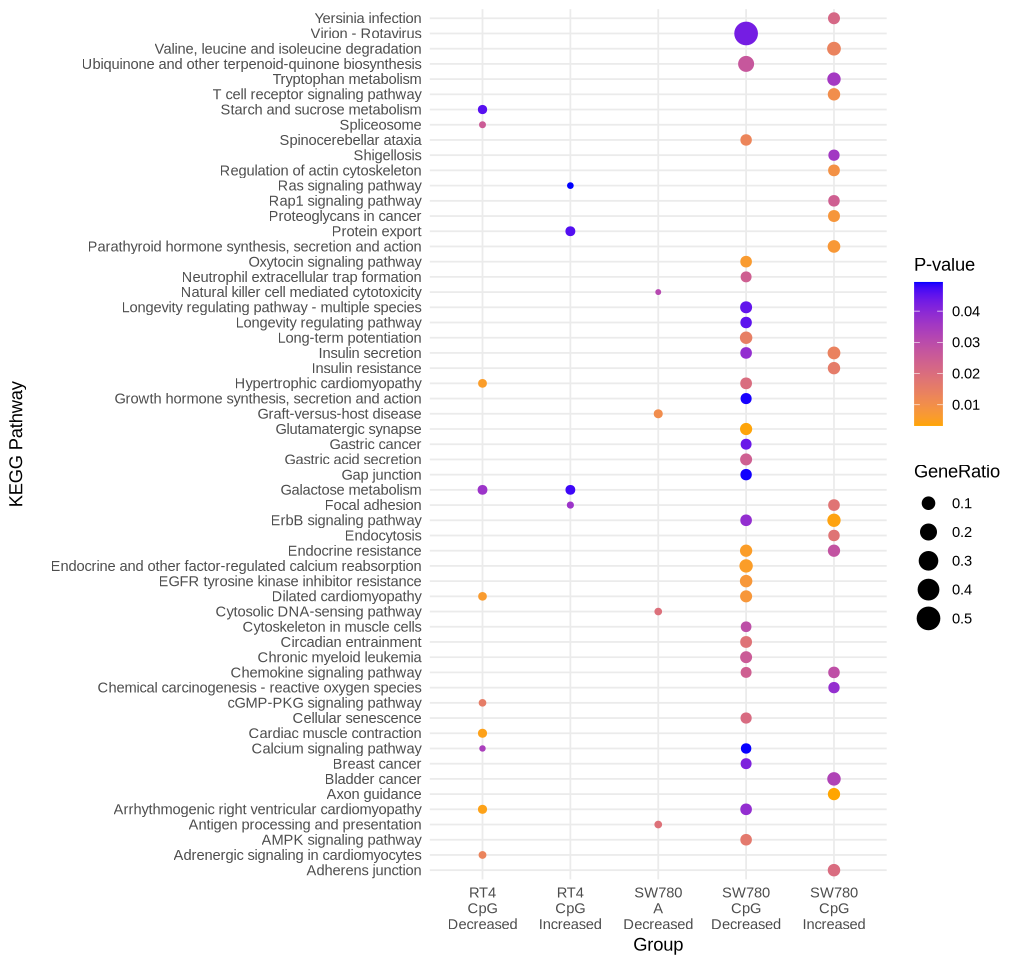

In [112]:
# Create the bubble plot
num_groups = length(unique(bubble_df_kegg$Group))
height = 0.12*(dim(bubble_df_kegg)[1])
width = (1.0*num_groups) + 3.5
options(repr.plot.width = width, repr.plot.height = height) 
ggplot(bubble_df_kegg, aes(x = Group, y = Pathway, size = GeneRatio, color = P.DE)) +
  geom_point() +
  scale_color_gradient(low = "orange", high = "blue") +
  theme_minimal() +
  labs(x = "Group", y = "KEGG Pathway", size = "GeneRatio", color = "P-value")

In [82]:
# # What's the length of the kegg pathways?
# dim(bubble_df_kegg)
# head(bubble_df_kegg)
# 8/67
# 0.12*67
# 0.12*(dim(bubble_df_kegg)[1])

# What's the width of the plot?
dim(bubble_df_kegg)
head(bubble_df_kegg)
num_groups = length(unique(bubble_df_kegg$Group))
num_groups

# 7 inches = 10 cm
# 3.5 cm out of 10 = 5 groups
# how many inches per group
3.5/10
0.35*7
# 2.45 inches per group
# how much is leftover?
7-(2.45*5)

[1] 67  4

,Pathway,P.DE,GeneRatio,Group
,<chr>,<dbl>,<dbl>,<chr>
1,"Valine, leucine and isoleucine degradation",0.013504114,0.10416667,SW780: CpG Increased
2,Tryptophan metabolism,0.035328868,0.09523810,SW780: CpG Increased
3,Endocrine resistance,0.027787498,0.07070707,SW780: CpG Increased
4,ErbB signaling pathway,0.003928148,0.09302326,SW780: CpG Increased
5,Rap1 signaling pathway,0.024273184,0.05660377,SW780: CpG Increased
6,Chemokine signaling pathway,0.029000194,0.05699482,SW780: CpG Increased


[1] 5

[1] 0.35

[1] 2.45

[1] -5.25

In [117]:
head(bubble_df_go_bp)

,P.DE,GeneRatio,Group,Pathway
,<dbl>,<dbl>,<chr>,<chr>
1,0.0012793650,0.03666903,SW780 CpG Increased,regulation of response to stimulus
2,0.0001258779,0.03288789,SW780 CpG Increased,regulation of biological process
3,0.0009488997,0.03257384,SW780 CpG Increased,regulation of cellular process
4,0.0003667212,0.03249069,SW780 CpG Increased,biological regulation
5,0.0020573921,0.03570691,SW780 CpG Increased,multicellular organism development
6,0.0022337329,0.07070707,SW780 CpG Increased,negative regulation of peptidase activity


In [126]:
pathway_counts


                                   actin crosslink formation 
                                                           1 
                             actin cytoskeleton organization 
                                                           2 
                                 actin filament organization 
                                                           1 
                               actin filament polymerization 
                                                           1 
                                actin filament-based process 
                                                           2 
                    actin polymerization or depolymerization 
                                                           1 
                                            action potential 
                                                           1 
                            anatomical structure development 
                                                           2 
       

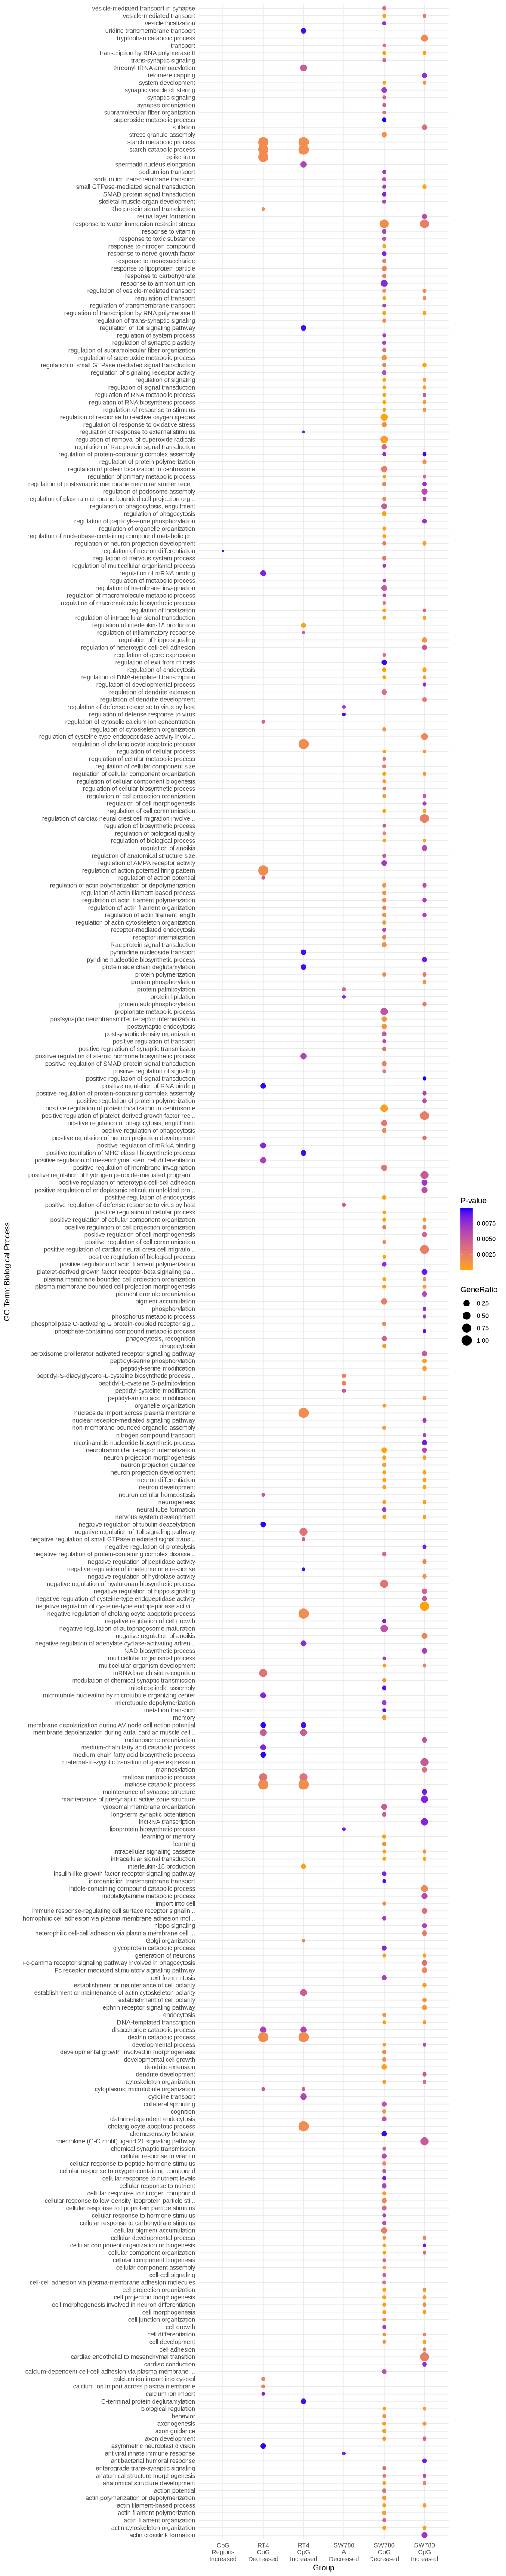

In [130]:
# Create the bubble plot

# First filter SW780 decreased to reduce size
# Identify pathways that appear in multiple groups
pathway_counts <- table(bubble_df_go_bp$Pathway)
# Filter the data frame
filtered_df <- subset(
  bubble_df_go_bp, 
    Group != "SW780\nCpG\nDecreased" | 
    (Group == "SW780\nCpG\nDecreased" & 
      P.DE < 0.007 & 
      GeneRatio > 0.5 & 
      Pathway %in% names(pathway_counts[pathway_counts > 1])
    )
)


num_groups = length(unique(bubble_df_go_bp$Group))
height = 0.12*(dim(bubble_df_go_bp)[1])
width = (1.0*num_groups) + 3.8

options(repr.plot.width = width, repr.plot.height = height) 
ggplot(bubble_df_go_bp, aes(x = Group, y = Pathway, size = GeneRatio, color = P.DE)) +
  geom_point() +
  scale_color_gradient(low = "orange", high = "blue") +
  theme_minimal() +
  labs(x = "Group", y = "GO Term: Biological Process", size = "GeneRatio", color = "P-value")

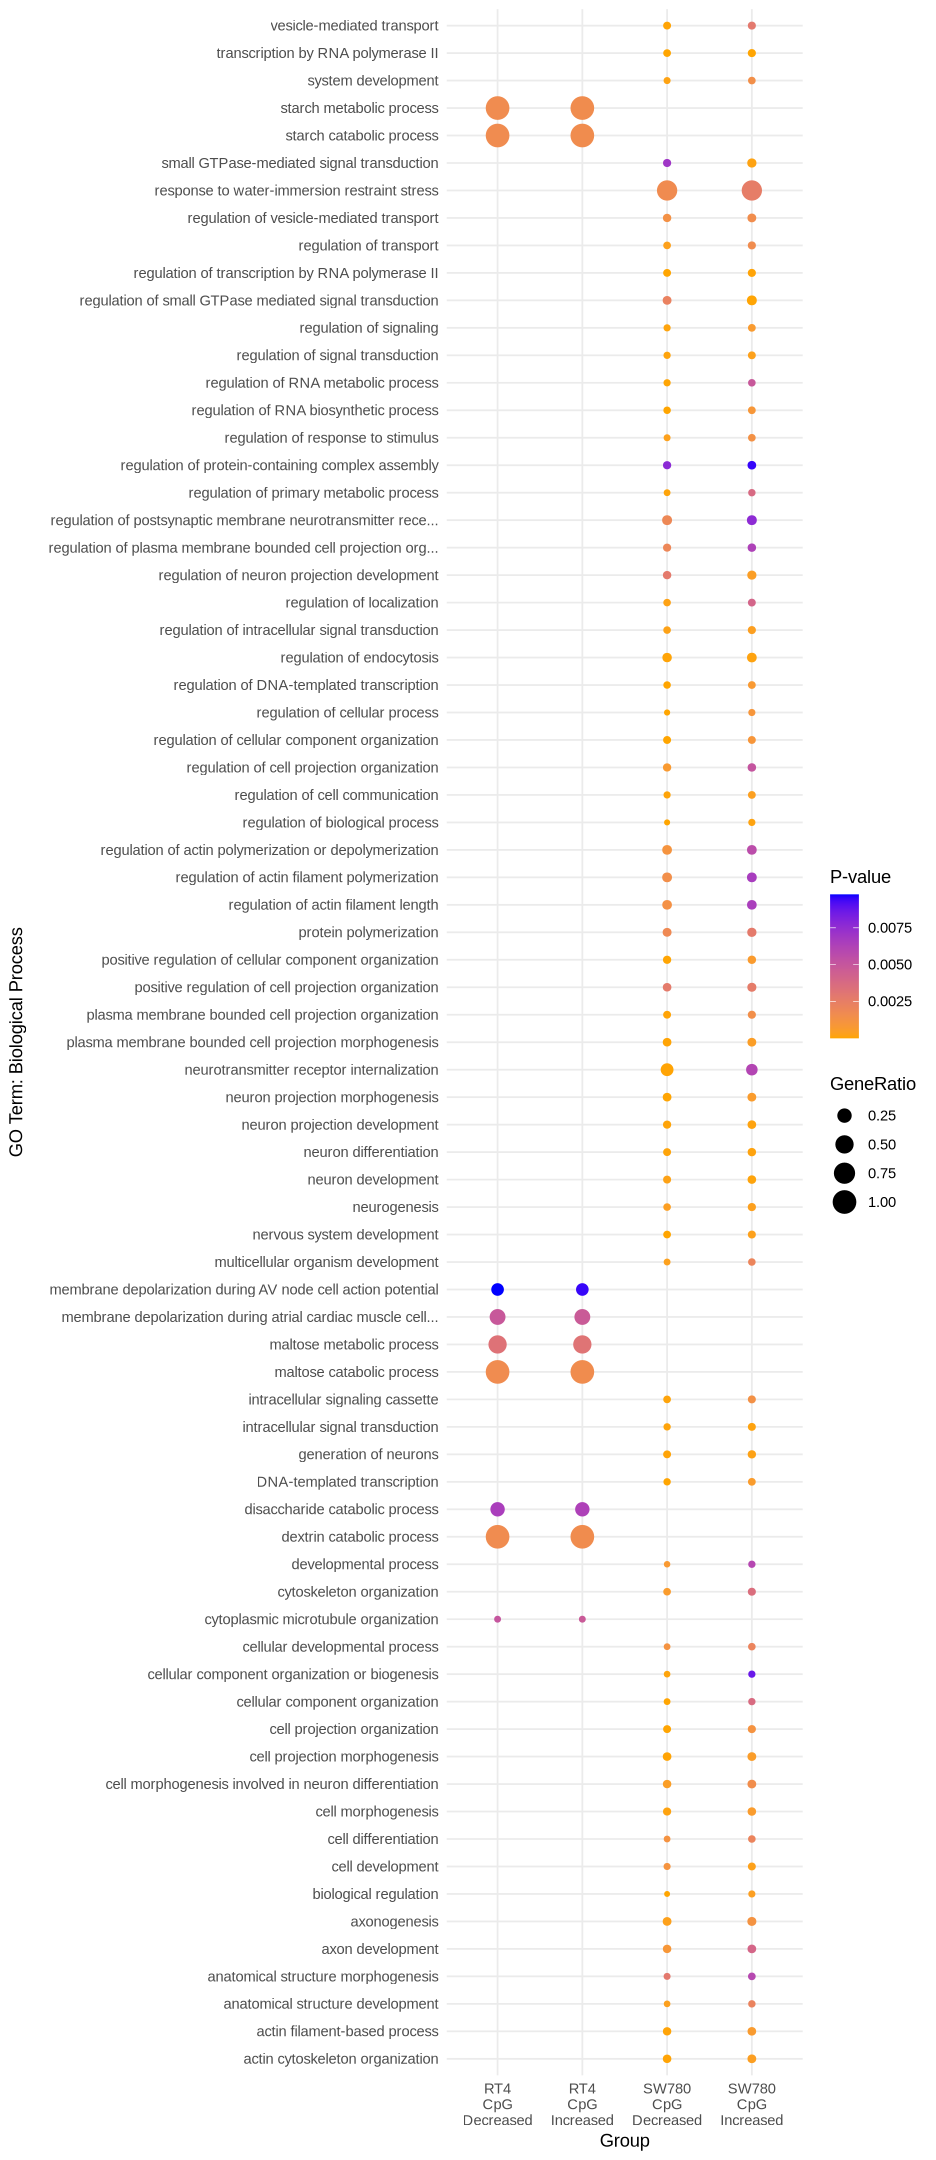

In [131]:
# Filtered version
# Identify pathways that appear in multiple groups
pathway_counts <- table(bubble_df_go_bp$Pathway)
shared_pathways <- names(pathway_counts[pathway_counts > 1])

# Filter the dataframe
filtered_df <- subset(
  bubble_df_go_bp, 
  Pathway %in% shared_pathways | 
    (Group == "SW780\nCpG\nDecreased" & 
     P.DE < 0.007 & 
     GeneRatio > 0.5)
)

num_groups = length(unique(filtered_df$Group))
height = 0.12*(dim(filtered_df)[1])
width = (1.0*num_groups) + 3.8

options(repr.plot.width = width, repr.plot.height = height) 
ggplot(filtered_df, aes(x = Group, y = Pathway, size = GeneRatio, color = P.DE)) +
  geom_point() +
  scale_color_gradient(low = "orange", high = "blue") +
  theme_minimal() +
  labs(x = "Group", y = "GO Term: Biological Process", size = "GeneRatio", color = "P-value")

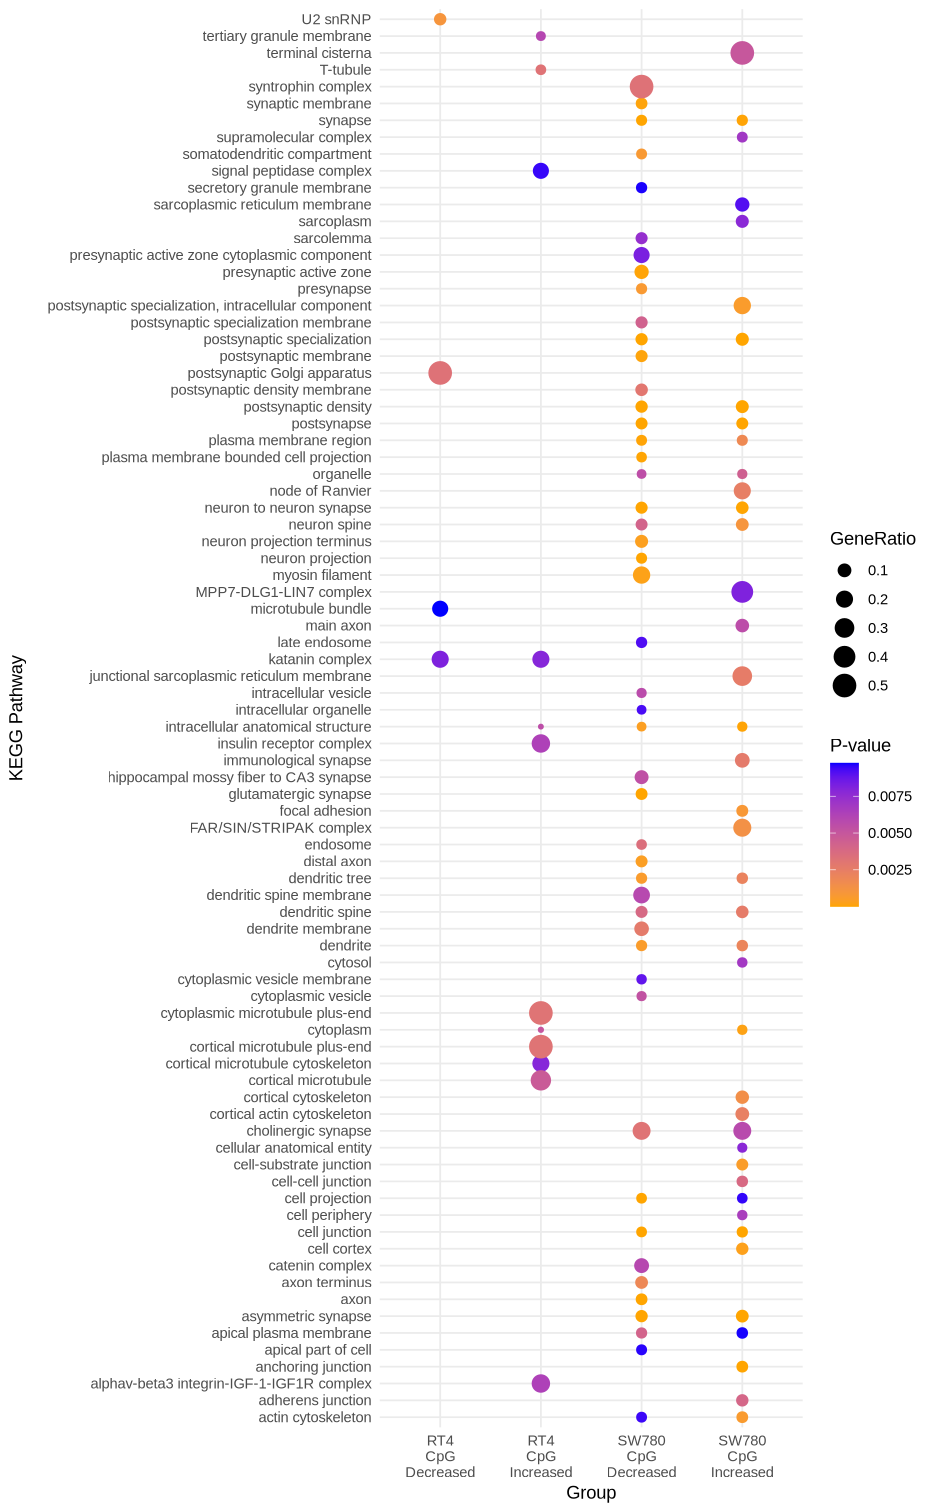

In [114]:
num_groups = length(unique(bubble_df_go_cc$Group))
height = 0.12*(dim(bubble_df_go_cc)[1])
width = (1.0*num_groups) + 3.8

options(repr.plot.width = width, repr.plot.height = height) 
ggplot(bubble_df_go_cc, aes(x = Group, y = Pathway, size = GeneRatio, color = P.DE)) +
  geom_point() +
  scale_color_gradient(low = "orange", high = "blue") +
  theme_minimal() +
  labs(x = "Group", y = "KEGG Pathway", size = "GeneRatio", color = "P-value")

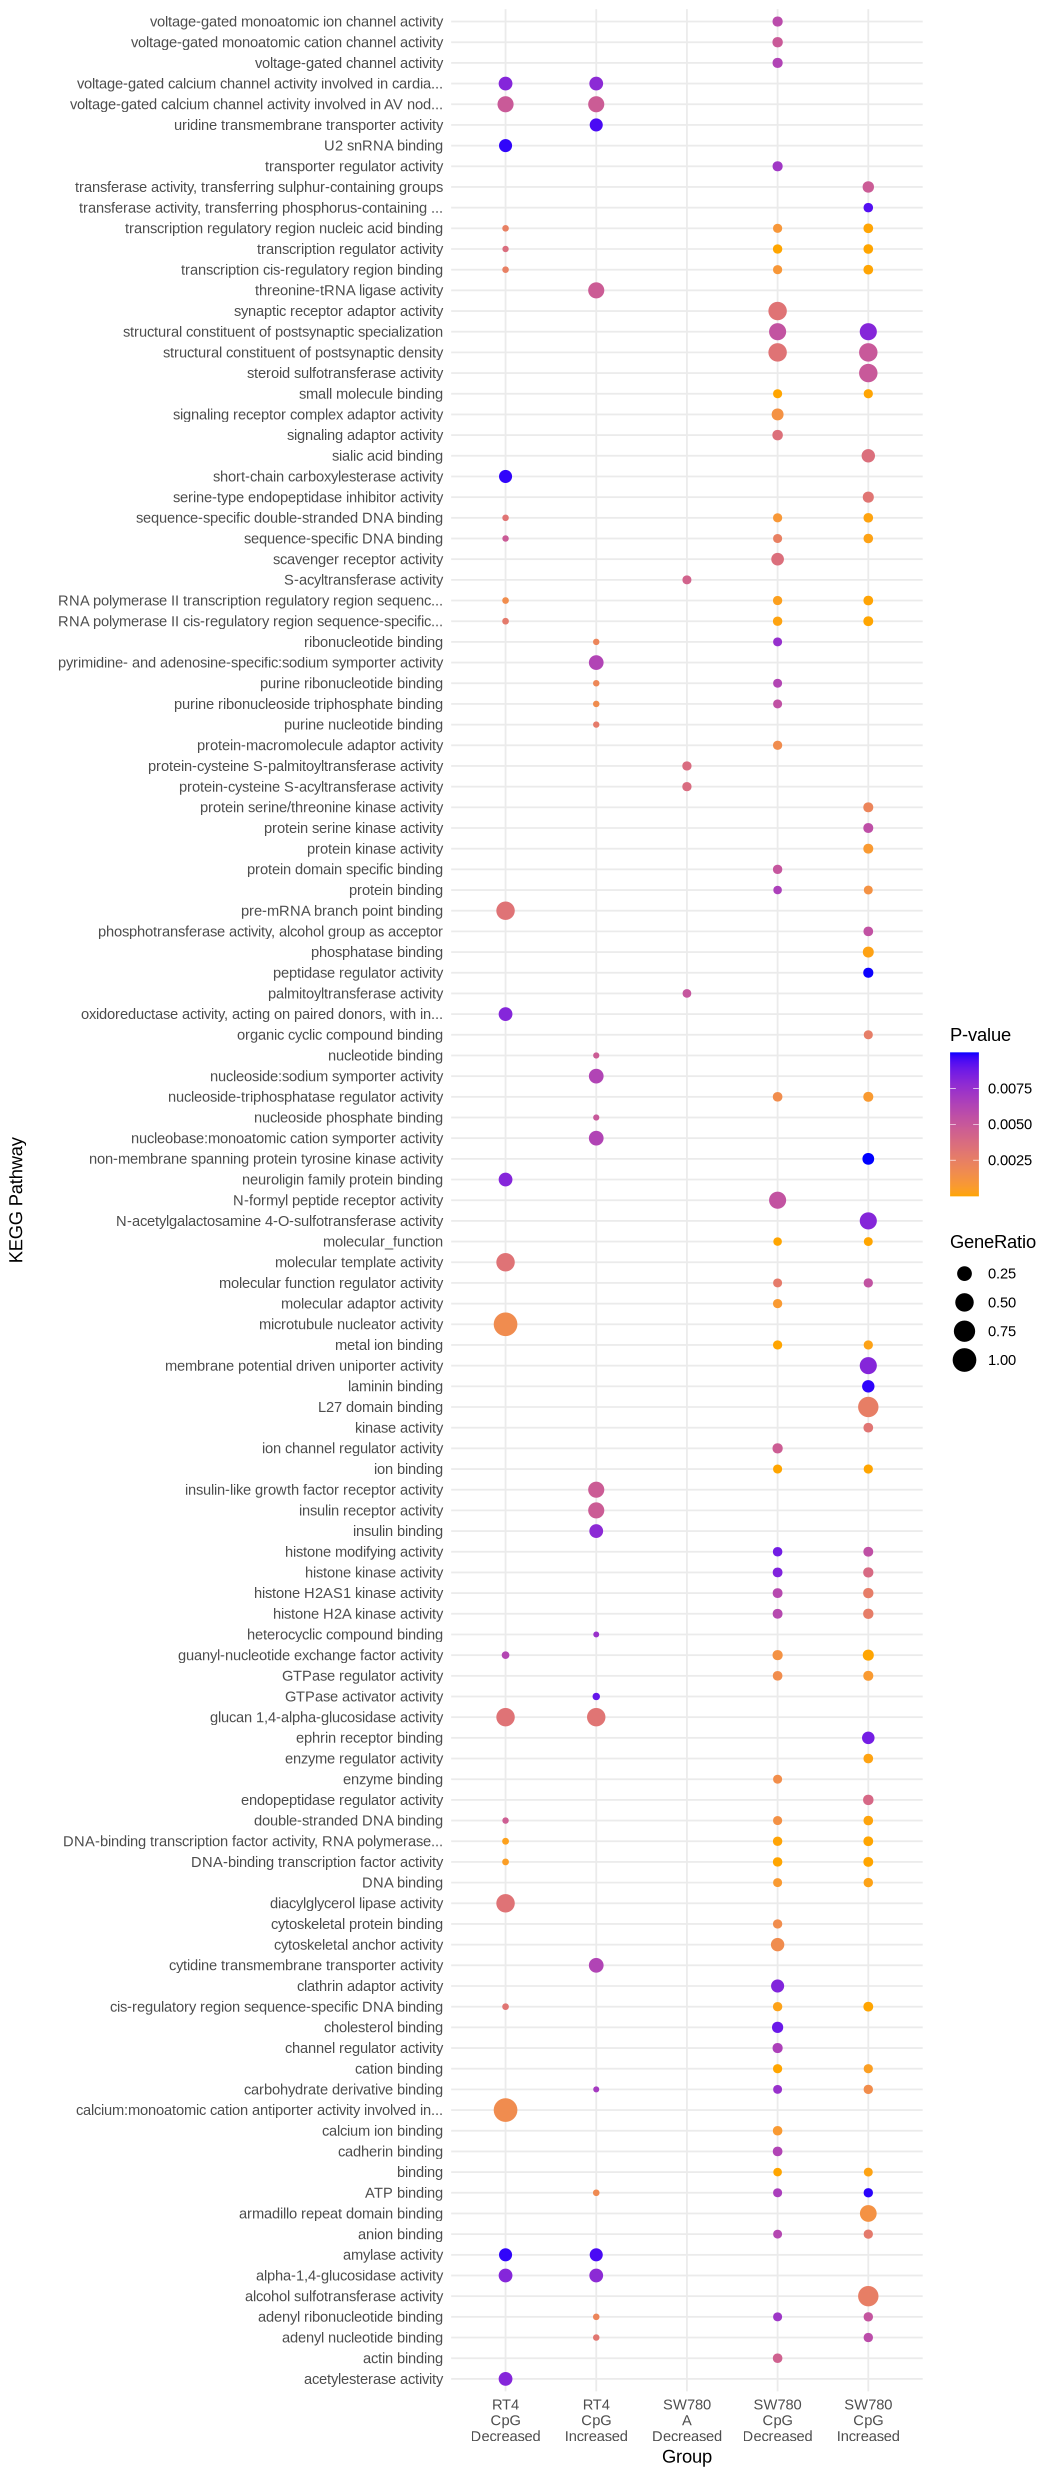

In [115]:
num_groups = length(unique(bubble_df_go_mf$Group))
height = 0.12*(dim(bubble_df_go_mf)[1])
width = (1.0*num_groups) + 3.8

options(repr.plot.width = width, repr.plot.height = height) 
ggplot(bubble_df_go_mf, aes(x = Group, y = Pathway, size = GeneRatio, color = P.DE)) +
  geom_point() +
  scale_color_gradient(low = "orange", high = "blue") +
  theme_minimal() +
  labs(x = "Group", y = "KEGG Pathway", size = "GeneRatio", color = "P-value")

Python

In [17]:
# Create the bubble plot
plt.figure(figsize=(10, 6))
bubble = plt.scatter(
    x=np.arange(unique(bubble_df$Group)),
    y=bubble_df['Pathway'],
    s=bubble_df['GeneRatio'] * 1000,  # Scale the size for better visualization
    c=bubble_df['P.DE'],
    cmap='coolwarm',
    alpha=0.6,
    edgecolors="w",
    linewidth=2
)

plt.colorbar(bubble, label='Adjusted P-value')
plt.xlabel('Group')
plt.ylabel('KEGG Pathway')
plt.title('Bubble Plot of KEGG Pathways')
plt.xticks(np.arange(unique(bubble_df$Group)), df.index)
plt.grid(True)
plt.show()

ERROR: Error in parse(text = input): <text>:2:23: unexpected ','
1: # Create the bubble plot
2: plt.figure(figsize=(10,
                         ^
